<a href="https://colab.research.google.com/github/vedpd/Module4_AAI_521_ComputerVision/blob/main/AAI521_VedPrakashDwivedi_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Name : Ved Prakash Dwivedi
2. Date : 25/10/2025

**Part 1- Neural Network**

In [13]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
import matplotlib.pyplot as plt
import keras.datasets.fashion_mnist as fashion_mnist

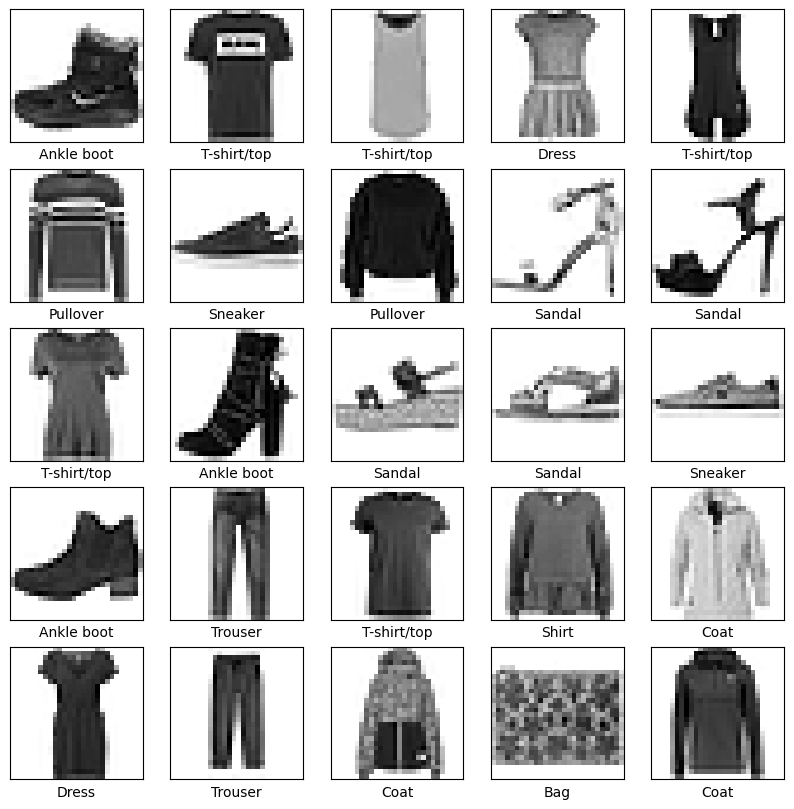

In [14]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# plot 4 images as gray scale
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [15]:
# flatten 28*28 images to a 784 vector for each image
IMG_HEIGHT=28
IMG_WIDTH= 28
channels =1

In [16]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [17]:
#Create the model here
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH)),
                             tf.keras.layers.Dense(128, activation= 'relu'),
                             tf.keras.layers.Dense(10, activation= 'softmax')])
model.compile(optimizer='adam', loss= loss_fn, metrics=['accuracy'])

In [18]:
# Train the model here
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=128)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7327 - loss: 0.7864 - val_accuracy: 0.8323 - val_loss: 0.4705
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8480 - loss: 0.4350 - val_accuracy: 0.8561 - val_loss: 0.4036
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8644 - loss: 0.3829 - val_accuracy: 0.8658 - val_loss: 0.3877
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8750 - loss: 0.3533 - val_accuracy: 0.8714 - val_loss: 0.3610
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8832 - loss: 0.3265 - val_accuracy: 0.8736 - val_loss: 0.3559
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8877 - loss: 0.3100 - val_accuracy: 0.8703 - val_loss: 0.3613
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8917 - loss: 0.2988 - val_accuracy: 0.8736 - val_loss: 0.3468
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8959 - loss: 0.2875 - val_accuracy: 0.

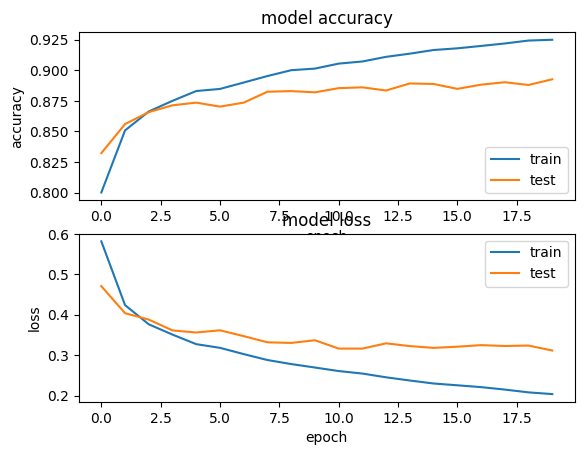

In [19]:
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

In [20]:
# Write your understanding about this model here


**Understanding the Graphs** </br>
**1. Model Accuracy (Top Plot)**
- **Training accuracy (blue)** continues to rise steadily, reaching around **92–93%**.  
- **Validation (test) accuracy (orange)** improves initially (up to ~88%) but then **plateaus** and even fluctuates slightly.  

**Interpretation:**  
The model is **learning** well on training data but **not generalizing** equally well to unseen (test) data.

---

**2. Model Loss (Bottom Plot)**
- **Training loss** steadily decreases (a sign of good fit).  
- **Validation loss** also decreases at first but **flattens** and slightly diverges from training loss after several epochs.  

**Interpretation:**  
This divergence between training and validation curves indicates **overfitting** — the model is starting to memorize the training data rather than learning generalizable patterns.

---

Diagnosis: Overfitting

Your simple Dense network (128 neurons, ReLU + Softmax) is small but still enough to overfit Fashion-MNIST after several epochs because:

- No **regularization** (Dropout, L2, etc.)  
- No **data augmentation**  
- Possibly too many epochs for this architecture.

In [21]:
# let's do some improvement for the overfitting by adding regularization

model_reg = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [22]:
model_reg.compile(optimizer='adam', loss= loss_fn, metrics=['accuracy'])

# Train the model here
hist_reg = model_reg.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=128)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6866 - loss: 1.0897 - val_accuracy: 0.8382 - val_loss: 0.5991
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8280 - loss: 0.6171 - val_accuracy: 0.8365 - val_loss: 0.5570
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8446 - loss: 0.5447 - val_accuracy: 0.8575 - val_loss: 0.4907
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8525 - loss: 0.5066 - val_accuracy: 0.8629 - val_loss: 0.4714
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8581 - loss: 0.4877 - val_accuracy: 0.8641 - val_loss: 0.4604
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8549 - loss: 0.4820 - val_accuracy: 0.8637 - val_loss: 0.4499
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8589 - loss: 0.4698 - val_accuracy: 0.8674 - val_loss: 0.4480
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8609 - loss: 0.4634 - val_accuracy: 0.

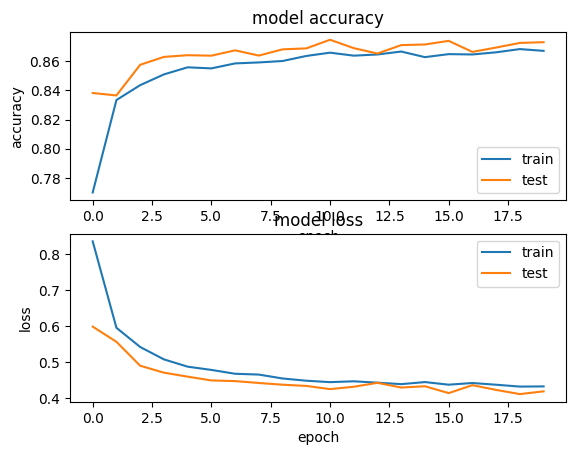

In [23]:
#plotting the results
plt.subplot(2,1,1)
plt.plot(hist_reg.history['accuracy'])
plt.plot(hist_reg.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(hist_reg.history['loss'])
plt.plot(hist_reg.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

**Understanding the Updated Graphs**
</br>

**1. Model Accuracy (Top Plot)**
- Both **training** and **validation accuracy** curves increase steadily and **stay close** throughout training.  
- Validation accuracy is slightly higher than training accuracy at times — a common effect when **Dropout** and **L2 regularization** are used.  
- Final accuracy stabilizes around **86-87%** for both sets.

**Interpretation:**  
The model now **generalizes much better**. The previous overfitting pattern (where training accuracy kept increasing while validation accuracy plateaued) has been **resolved**.  
Regularization has successfully improved the balance between learning and generalization.

---

**2. Model Loss (Bottom Plot)**
- Both training and validation loss decrease smoothly and **converge near similar values**.  
- There's **no significant divergence**, indicating that the model fits well without memorizing the training data.

**Interpretation:**  
The inclusion of **Dropout (0.3)** and **L2 weight decay (0.001)** effectively prevented overfitting, leading to more stable and generalizable learning.

---

**Conclusion**

| Observation | Interpretation | Outcome |
|--------------|----------------|----------|
| Training and validation accuracy nearly overlap | Model generalizes well |  Balanced learning |
| Loss curves converge smoothly | No overfitting or underfitting | Stable training |
| Slightly lower peak accuracy vs earlier run | Regularization penalizes overconfident weights |  Better generalization |

**Overall:**  
model's learning dynamics are now healthy and well-regularized.  
achieving a strong trade-off between **accuracy** and **robustness to unseen data**.


**Part 2- Image Processing**

Load the Flower photo dataset from tensorflow repository

In [44]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)
data_dir = pathlib.Path(data_dir) / 'flower_photos'

In [45]:
# Step 3: Inspect the structure
print("Subfolders:", [item.name for item in data_dir.glob('*') if item.is_dir()])


Subfolders: ['roses', 'tulips', 'dandelion', 'daisy', 'sunflowers']


*a) How many images we can find in this dataset?*




In [46]:
image_count = len(list(data_dir.glob('**/*.jpg')))  #This will count all the file with extension of jpg- You have to modify this part
print(image_count)

3670


*b) The list of subfolders are:*
*   daisy
*   dandelion
*   roses
*   sunflowers
*   tulips

You can look into any of the subfolders to see images stored over there. You can look into the folder using: data_dir.glob('tulips/*')
For this part use Pillow (PIL) to show at least one flower from each subfolder


Number of tulip images: 799


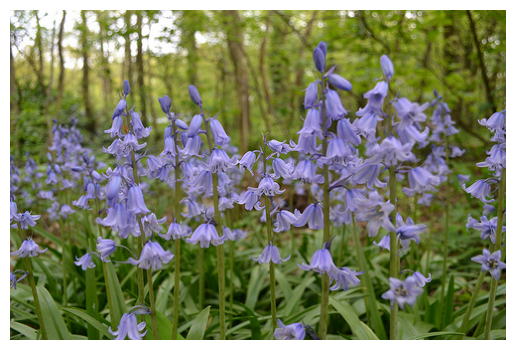

In [47]:
##tulips = list()    #This line stores the list of data in subfolder
tulips = list(data_dir.glob('tulips/*.jpg'))
print("Number of tulip images:", len(tulips))


tulip_img = PIL.Image.open(str(tulips[2]))              # Use Pillow here to plot the image
plt.imshow(tulip_img)
plt.axis('off')
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127799 (\N{TULIP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


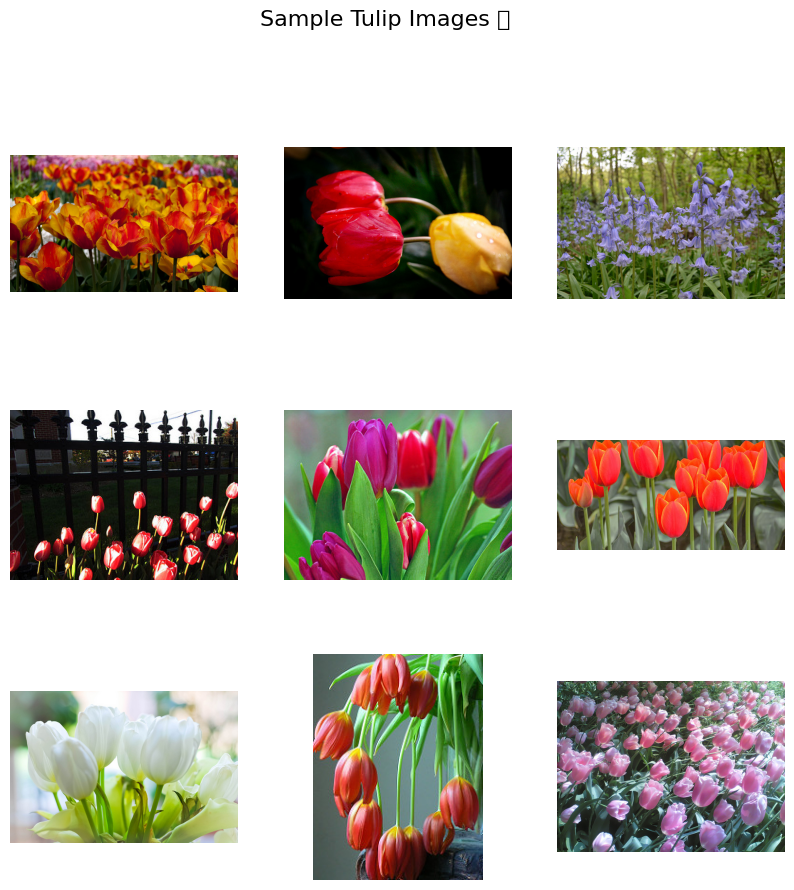

In [48]:
#let's look at all sample tulip images

import matplotlib.pyplot as plt
import PIL

plt.figure(figsize=(10, 10))

for i in range(9):
    img = PIL.Image.open(str(tulips[i]))
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')

plt.suptitle("Sample Tulip Images 🌷", fontsize=16)
plt.show()


*c) Use Keras to resize all the images into same dimension 180x180*

In [49]:
batch_size = 32
img_height = 180
img_width = 180

In [50]:
# Convert all the images in data_dir folder into 180x180 using tf.kera.utils.image_dataset_from_directory
# Modify following code
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,     # 80-20 train-validation split
    subset="training",
    seed=123,                 # for reproducibility
    image_size=(img_height, img_width),  # resize all images
    batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [51]:
# Use the same strategy to create validation data, this time from validation subset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 3670 files belonging to 5 classes.
Using 734 files for validation.


d) *You can use* `train_ds.class_names` *command to get the list of labels. Write a code to randomly show 9 images from training data while printing their label on top of the image.*

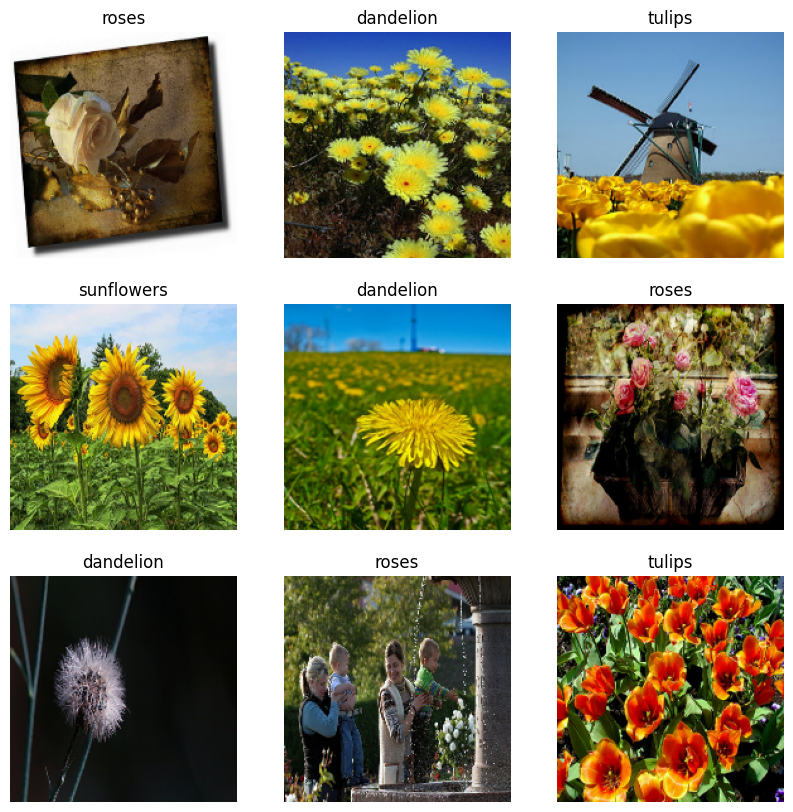

In [52]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))   #Modify this line
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# Please carefully review the images. What are some barriers that you can see in images for having a proper classification?

**Barriers to Proper Classification (observed in the sample images)** </br>

1. **Background clutter & distracting context**
   - Many images contain complex scenes (people, windmills, fountains, fields) that compete with the flower as the main signal.
   - Models can learn spurious correlations (e.g., windmill -> tulip) instead of flower features.

2. **Multiple objects / multiple flower instances**
   - Some images show many flowers or multiple species; label ambiguity arises (which flower is the target?).
   - Hard for single-label classifiers when several classes appear in one image.

3. **Occlusion**
   - Flowers partially hidden by leaves, other flowers, objects, or people — reduces visible discriminative features.

4. **Large variations in scale & viewpoint**
   - Close-ups vs distant fields vs small cropped flowers. Scale differences change texture/shape cues the model sees.

5. **Different lighting, color casts, and saturation**
   - Bright, shadowed, overexposed, or heavily saturated photos cause inconsistent color/contrast statistics.

6. **Stylized / heavily edited or non-photographic images**
   - Some “roses” look like paintings, collages or filtered images — domain mismatch for a model trained on natural photos.

7. **Rotation & non-standard orientation**
   - Tilted or rotated images (or images with added borders) change the spatial layout the model expects.

8. **Low resolution / compression artifacts**
   - Some thumbnails may be small or compressed, losing fine details useful for discrimination.

9. **Class ambiguity (visually similar species)**
   - Some classes (e.g., certain daisies vs dandelions or small yellow flowers) can be visually similar and require subtle cues.

10. **Label noise or dataset inconsistencies**
    - If dataset labels are noisy (wrong label, multiple labels), the model’s learning is harmed.


*e* - *Now, we want to use preprocessing package in Keras to apply different filters to the image. Apply the following procedures to image data:*
- *Rescale the image by dividing by 255*
- *Shear the image 20%*
- *Zoom the image 20%*
- *Horizontally flip the images*

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values
    shear_range=0.2,         # Shear transformation (20%)
    zoom_range=0.2,          # Zoom in/out (20%)
    horizontal_flip=True     # Flip images horizontally

)  # Modify this line of code

training_set = train_datagen.flow_from_directory(
    data_dir,                # Path to the folder containing subfolders of classes
    target_size=(180, 180),  # Resize all images to 180x180
    batch_size=32,           # Number of images per batch
    class_mode='categorical' # For multi-class classification
)   # Modify this line of code



Found 3670 images belonging to 5 classes.


**Part 3- OPENCV**- Now use opencv for preprocessing. Show first 9 images in dataset using Opencv. Before showing each image, resize the images to 180x180.

<Figure size 1000x1000 with 0 Axes>

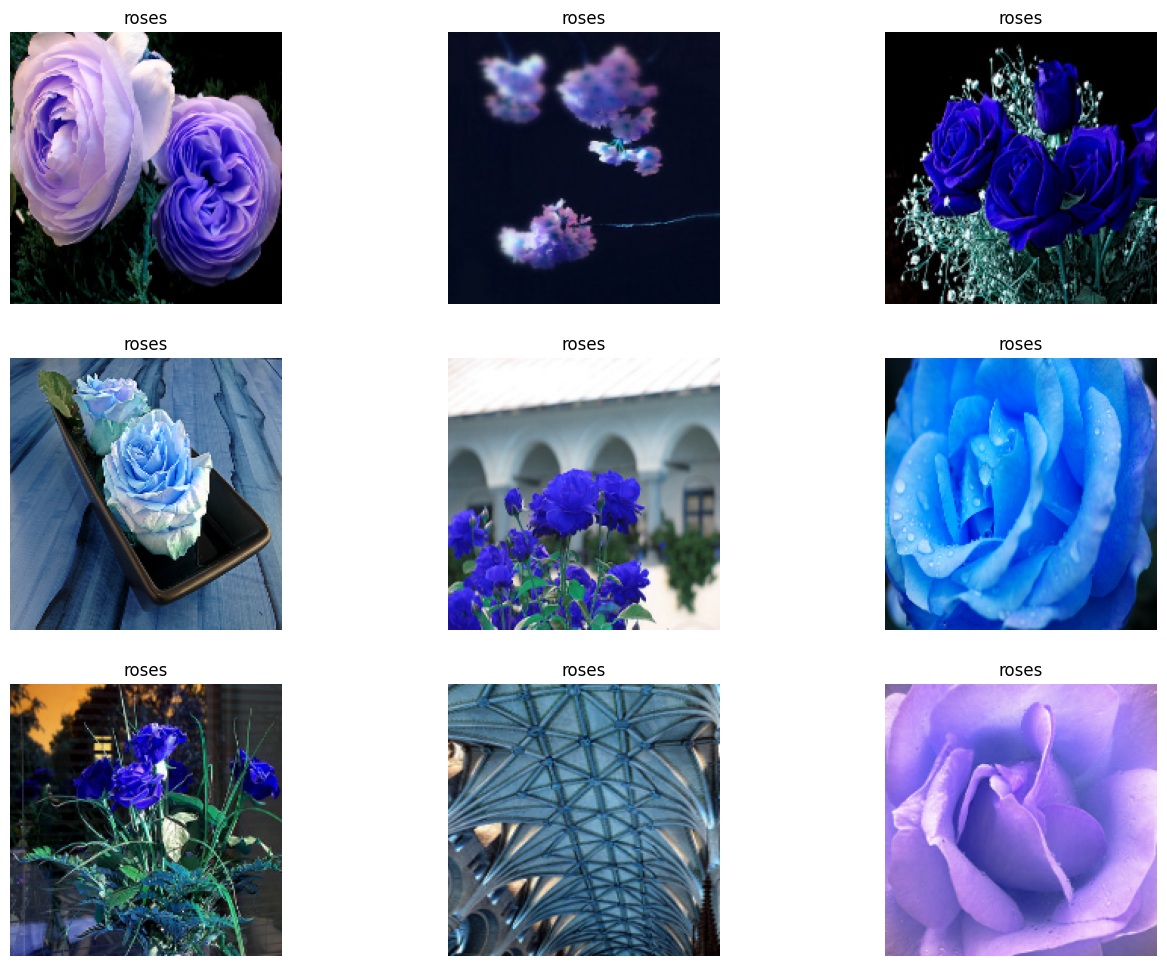

In [58]:
# Repeat same preprocessing but this time using OpenCV. Show first 9 images in dataset using Opencv. Before showing each image, resize the images to 180x180.
import cv2
list_of_images= list(data_dir.glob('*/*.jpg'))
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
fig=plt.figure(figsize=(16, 12))

for i in range(9):
    # Add appropriate lines of code to create this output

    # Read the image using OpenCV
    img = cv2.imread(str(list_of_images[i]))

    # No color change while loading the images.

    # Resize image to 180x180
    img = cv2.resize(img, (180, 180))

    # Display the image
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)

    # Extract class name from the image path (parent folder name)
    label = list_of_images[i].parent.name
    plt.title(label)
    plt.axis("off")


plt.show()


OpenCV uses BGR as its default colour order for images, matplotlib uses RGB. When you display an image loaded with OpenCv in matplotlib the channels will be back to front.
The easiest way of fixing this is to use OpenCV to explicitly convert it back to RGB, much like you do when creating the greyscale image.
`RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)`

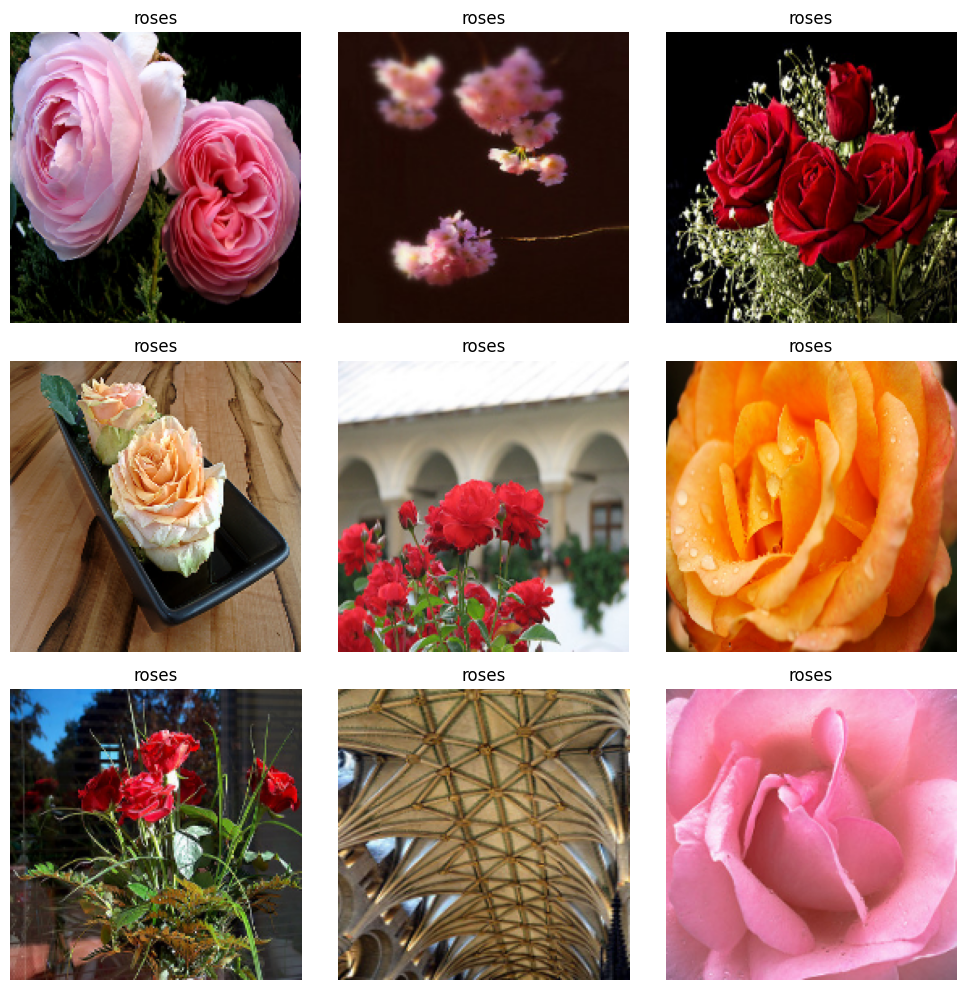

In [59]:
# Add the code here to create the output
import cv2
import matplotlib.pyplot as plt

# List all images in the dataset
list_of_images = list(data_dir.glob('*/*.jpg'))

plt.figure(figsize=(10, 10))

for i in range(9):
    # Read the image using OpenCV (BGR format)
    img = cv2.imread(str(list_of_images[i]))

    # Convert BGR to RGB for correct display in matplotlib
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image to 180x180
    RGB_img = cv2.resize(RGB_img, (180, 180))

    # Display the image
    plt.subplot(3, 3, i + 1)
    plt.imshow(RGB_img)

    # Extract class label from parent folder name
    label = list_of_images[i].parent.name
    plt.title(label)
    plt.axis("off")

plt.tight_layout()
plt.show()
